# Course Name: Visualisation for Data Analytics
# Objective: Time Series Analysis Part2

# 
For this set of exercises we're using data from the Federal Reserve Economic Database (FRED) concerning the Industrial Production Index for Electricity and Gas Utilities from January 1970 to December 1989.

Data source: https://fred.stlouisfed.org/series/IPG2211A2N

## Read the 'EnergyProduction.csv'

In [ ]:
import pandas as pd
df = pd.read_csv("EnergyProduction.csv")

In [ ]:
df.head()

,DATE,EnergyIndex
0,1970-01-01,43.0869
1,1970-02-01,42.5577
2,1970-03-01,41.6215
3,1970-04-01,40.1982
4,1970-05-01,39.9321


In [ ]:
df.describe()

,EnergyIndex
count,240.000000
mean,56.502198
std,9.043582
min,39.932100
25%,49.799000
50%,55.607250
75%,62.656200
max,84.404000


## Q1. Assign a frequency of 'MS' to the DatetimeIndex.

In [ ]:
df.set_index('DATE', inplace=True)
#Lector's Ans :
#df.index.freq = 'MS'
#df.index

In [ ]:
df.tail()

,EnergyIndex
DATE,
1989-08-01,75.2704
1989-09-01,69.5107
1989-10-01,66.0620
1989-11-01,69.2555
1989-12-01,84.4040


In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321
...,...
1989-08-01,75.2704
1989-09-01,69.5107
1989-10-01,66.0620


## Q2. Plot the dataset.

<AxesSubplot:xlabel='DATE'>

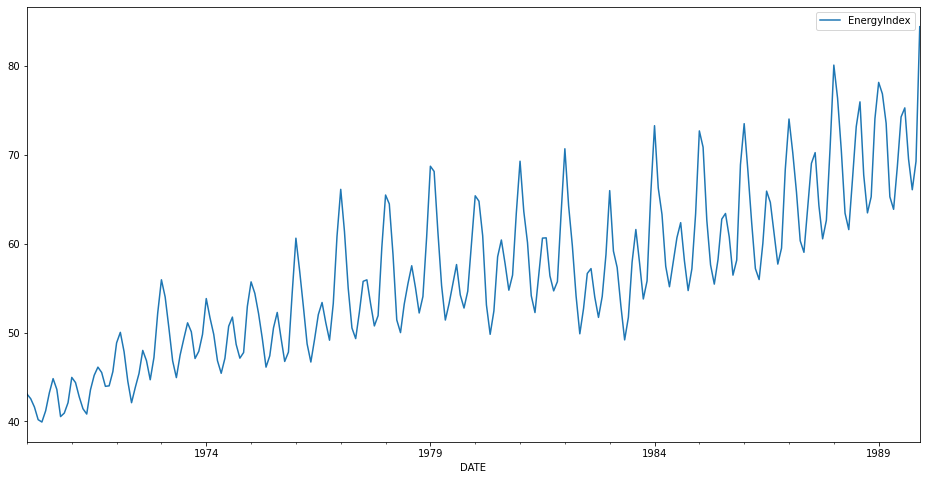

In [ ]:
df.plot(figsize=(16, 8))
#df.plot(figsize=(12,6)).autoscale(axis='x',tight=True);


### Q3. Add a column that shows a 12-month Simple Moving Average (SMA).<br>&nbsp;&nbsp;&nbsp;&nbsp;Plot the result.

In [ ]:
import numpy as np

In [ ]:
# calculating simple moving average
# using .rolling(window).mean() ,
# with window size = 12
df['SMA'] = df['EnergyIndex'].rolling(12).mean()
  
# removing all the NULL values using 
# dropna() method
df.dropna(inplace=True)
df


,EnergyIndex,SMA
DATE,,
1970-12-01,42.1117,41.984625
1971-01-01,44.9517,42.140025
1971-02-01,44.3696,42.291017
1971-03-01,42.7548,42.385458
1971-04-01,41.4234,42.487558
...,...,...
1989-08-01,75.2704,70.527767
1989-09-01,69.5107,70.676800
1989-10-01,66.0620,70.893700


<AxesSubplot:xlabel='DATE'>

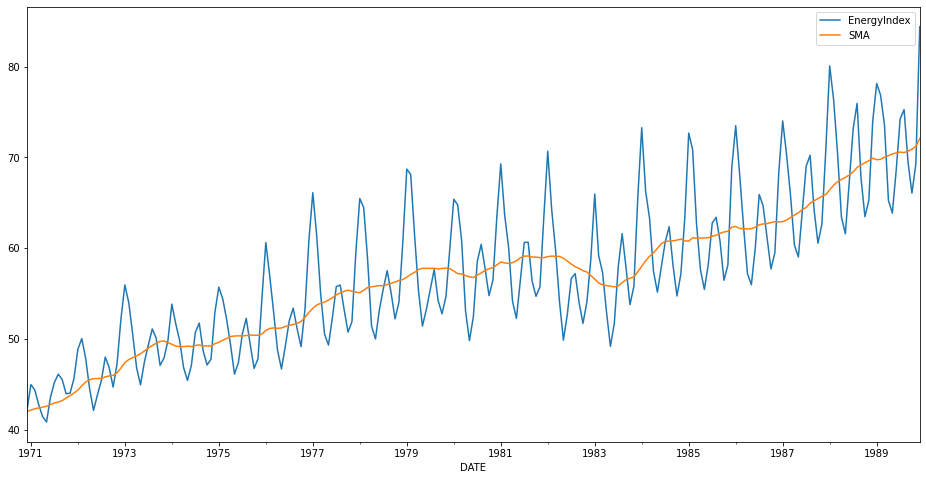

In [ ]:
# plotting EnergyIndex	 and simple
# moving average of 12 months using .plot() method
df[['EnergyIndex', 'SMA']].plot(label='Energy', 
                                  figsize=(16, 8)) 

#Lector's Ans :
#df['SMA12'] = df['EnergyIndex'].rolling(window=12).mean()
#df.plot(figsize=(12,6)).autoscale(axis='x',tight=True);


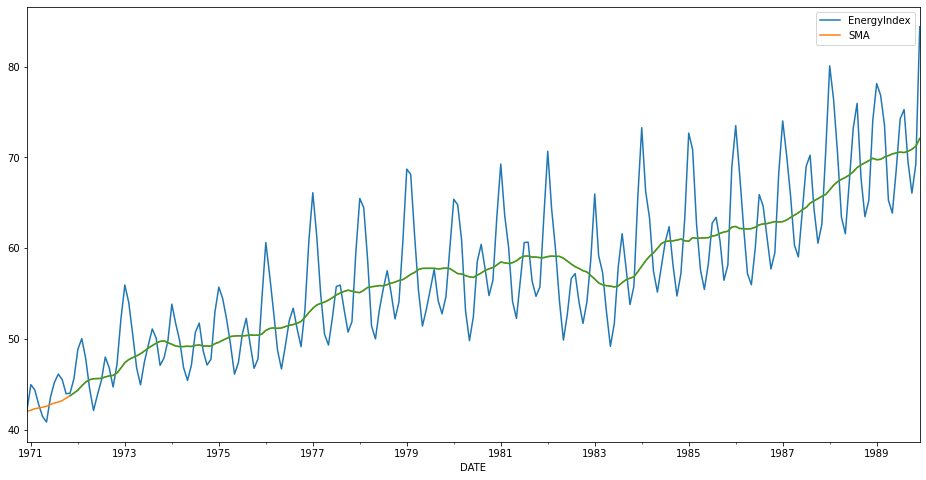

In [ ]:
import pandas as pd
import numpy as np
df3 = pd.read_csv('EnergyProduction.csv',index_col='DATE',parse_dates=True)
df3.dropna(inplace=True)
df.plot()
df.rolling(window=12).mean()['EnergyIndex'].plot(figsize=(16, 8));

## Q4. Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels <tt>SimpleExpSmoothing</tt> function. Plot the result.

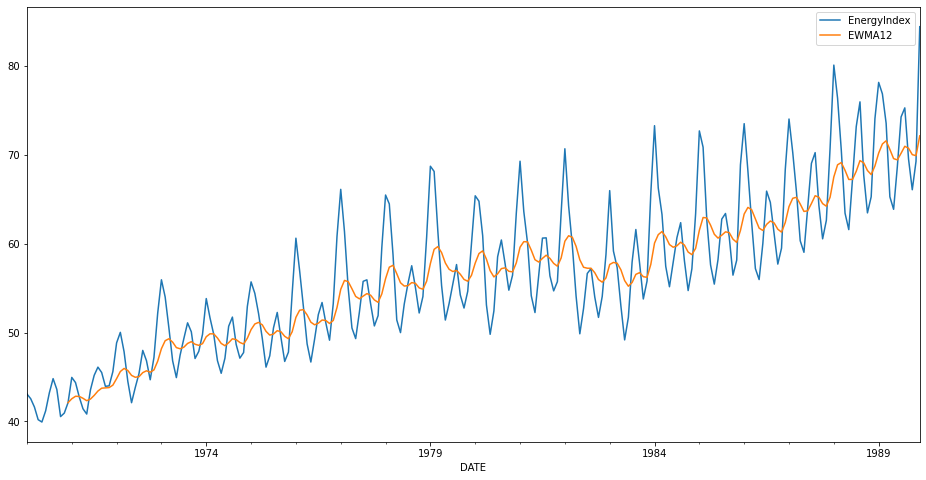

In [ ]:
import pandas as pd
import numpy as np
df2 = pd.read_csv('EnergyProduction.csv',index_col='DATE'
,parse_dates=True)
df2.dropna(inplace=True)
df2['EWMA12'] = df['EnergyIndex'].ewm(span=12,adjust=False).mean()
df2[['EnergyIndex','EWMA12']].plot(figsize=(16, 8));


In [ ]:
#Lector's Ans :
#from statsmodels.tsa.holtwinters import SimpleExpSmoothing

#df['SES12']=SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=2/(12+1),optimized=False).fittedvalues.shift(-1)
#df.plot(figsize=(12,6)).autoscale(axis='x',tight=True);

## Q5. Apply ETS decompositon on 'Energy Index' column and analyze the trend?

            EnergyIndex        SMA
DATE                              
1970-12-01      42.1117  41.984625
1971-01-01      44.9517  42.140025
1971-02-01      44.3696  42.291017
1971-03-01      42.7548  42.385458
1971-04-01      41.4234  42.487558


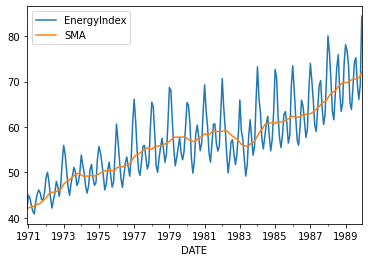

In [ ]:
import pandas as pd
import numpy as np
df4 = pd.read_csv('EnergyProduction.csv',index_col='DATE',parse_dates=True)
#We have to remove all the missing values before applying ETS decomposition model
df4.dropna(inplace=True)
print(df.head())
df.plot();

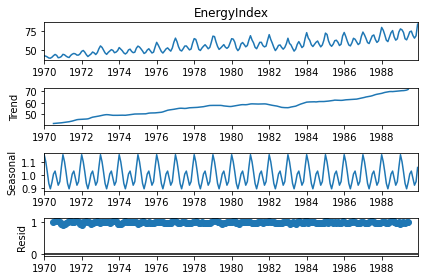

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df4['EnergyIndex'], model='multiplicative') # model='mul' also works
result.plot();

In [ ]:
#Lector's Ans :
#from statsmodels.tsa.seasonal import seasonal_decompose

#df.dropna(inplace=True)
#print(df.head())
#Plot the original dataset
#df.plot();

#applying ETS decomposition model
#result = seasonal_decompose(df['EnergyIndex'], 
#model='multiplicative')  # model='mul' also works
#result.plot();

# Code Credit
###  udemy course:Python for Time Series Data Analysis